# Data Inspection for AirBnB Dataset
## Central Region of the U.S

  - Nashville TN
  - Denver CO
  - Ausin TX
  - Chicago IL
  - New Orleans LA


## Procedure

1. Basic Structure (# of Rows and Columns)

2. Missing Values
  - By column
  - By City

3. Data Types

4. Unique Values by Column

5. EDA Plots



## Function for the Inspection

### 1. Simple EDA

**Purpose:**
The simple_eda function is designed to perform a basic exploratory data analysis (EDA) on a given DataFrame. It provides essential insights into the structure, missing values, data types, unique values, and summary statistics of the DataFrame.

Steps:
1. **Basic Structure:**

Prints the number of rows and columns in the DataFrame.

2. **Missing Values:**

Prints the count of missing values for each column in the DataFrame.

3. **Data Types:**

Prints the data types of each column in the DataFrame.

4. **Unique Values by Column:**

Prints the number of unique values for each column in the DataFrame.

5. **Summary Statistics for Numerical Columns:**

Provides summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for numerical columns in the DataFrame.

6. **Details on Categorical Columns:**

For each categorical column (object or category dtype), prints the unique values.

In [1]:
pwd

'/Users/eunji/Desktop/SP2024/big-data/project'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
def simple_eda(df):
    # Set display format to avoid scientific notation, adjust precision as needed
    pd.set_option('display.float_format', lambda x: '%.3f' % x)

    # Basic structure
    print("Basic Structure:")
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}\n")

    # Missing values
    print("Missing Values by Column:")
    print(df.isnull().sum(), "\n")

    # Data types
    print("Data Types:")
    print(df.dtypes, "\n")

    # Unique values by column
    print("Unique Values by Column:")
    for column in df.columns:
        print(f"{column}: {df[column].nunique()}")
    print("\n")

    # Summary statistics for numerical columns
    print("Summary Statistics for Numerical Columns:")
    print(df.describe(), "\n")

    # Details on categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("Categorical Columns Details:")
        for col in categorical_cols:
            print(f"Column '{col}' unique values:")
            print(df[col].unique())
    else:
        print("No categorical columns found.")


## Calendar Dataset

### EDA Plots for AirBnB Dataset - Calendar

1. Availability Count for Each Day

2. Mean Price Change Over Time for Different Locations

3. Mean Adjusted Price Change Over Time for Different Locations

4. Average Price by Availability for Different Cities


### Price Stats Function - Calendar Dataset

This function output the dollar value columns statistics.

In [5]:
calendar_austin = pd.read_csv('usa/Austin/calendar-austin.csv')
calendar_denver = pd.read_csv('usa/Denver/calendar-denver.csv')
calendar_nashville = pd.read_csv('usa/Nashville/calendar-nashville.csv')
calendar_chicago = pd.read_csv('usa/Chicago/calendar-chicago.csv')
calendar_nola = pd.read_csv('usa/New Orleans/calendar-nola.csv')

In [6]:
def calculate_price_stats(df):
    """
    Calculate maximum, minimum, average, and median prices from the "price" and "adjusted_price" columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing columns named "price" and "adjusted_price".

    Returns:
    - price_stats: dictionary containing the maximum, minimum, average, and median prices for both "price" and "adjusted_price".
    """
    # Convert the "price" column to numerical format
    df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)
    df['adjusted_price'] = df['adjusted_price'].str.replace('[\$,]', '', regex=True).astype(float)

    # Calculate statistics for "price" column
    max_price = df['price'].max()
    min_price = df['price'].min()
    avg_price = df['price'].mean()
    median_price = df['price'].median()

    # Calculate statistics for "adjusted_price" column
    max_adjusted_price = df['adjusted_price'].max()
    min_adjusted_price = df['adjusted_price'].min()
    avg_adjusted_price = df['adjusted_price'].mean()
    median_adjusted_price = df['adjusted_price'].median()

    # Create a dictionary to store the results
    price_stats = {
        "maximum_price": max_price,
        "minimum_price": min_price,
        "average_price": avg_price,
        "median_price": median_price,
        "maximum_adjusted_price": max_adjusted_price,
        "minimum_adjusted_price": min_adjusted_price,
        "average_adjusted_price": avg_adjusted_price,
        "median_adjusted_price": median_adjusted_price
    }

    return price_stats



### Difference in Price and Adjusted Price - Calendar Dataset

In [7]:
def calculate_price_difference_stats(df):
    """
    Calculate the range of absolute price differences between 'price' and 'adjusted_price' columns
    for a given DataFrame, excluding rows where the price difference is zero.

    Parameters:
    - df: pandas DataFrame containing 'price' and 'adjusted_price' columns.

    Returns:
    - None. The function prints the absolute price difference range and the number of rows
      with non-zero absolute price differences.
    """
    # Convert 'price' and 'adjusted_price' columns to numeric after removing the dollar sign and converting to float
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    df['adjusted_price'] = df['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

    # Check if there is any difference between 'price' and 'adjusted_price' columns in the same row
    df['price_difference'] = df['price'] - df['adjusted_price']

    # Calculate the absolute value of the price difference
    df['price_difference_abs'] = df['price_difference'].abs()

    # Filter out rows where the price difference is zero
    non_zero_diff_rows = df[df['price_difference'] != 0]

    # Calculate the range of the absolute price difference for non-zero difference rows
    price_difference_range_abs = {
        'max': non_zero_diff_rows['price_difference_abs'].max(),
        'min': non_zero_diff_rows['price_difference_abs'].min(),
        'median': non_zero_diff_rows['price_difference_abs'].median(),
        'average': non_zero_diff_rows['price_difference_abs'].mean()
    }

    # Print the absolute price difference range (excluding zero differences)
    print("Absolute Price Difference Range (Excluding Zero Differences):")
    print(price_difference_range_abs)
    print("\n")

    # Print the number of rows with non-zero absolute price differences
    print("Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):")
    print(len(non_zero_diff_rows))


In [8]:
calendar_austin.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5456,2023-03-16,f,$200.00,$200.00,2.0,90.0
1,5456,2023-03-17,f,$250.00,$250.00,2.0,90.0
2,5456,2023-03-18,f,$250.00,$250.00,2.0,90.0
3,5456,2023-03-19,t,$250.00,$250.00,2.0,90.0
4,5456,2023-03-20,f,$95.00,$95.00,2.0,90.0


## Austin Texas




In [9]:
simple_eda(calendar_austin)

Basic Structure:
Number of Rows: 5243973
Number of Columns: 7

Missing Values by Column:
listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      1
maximum_nights      1
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 14367
date: 380
available: 2
price: 4803
adjusted_price: 4799
minimum_nights: 72
maximum_nights: 390


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            5243973.000     5243972.000     5243972.000
mean  269445108794152224.000          10.806     3674510.410
std   349573732764484544.000          41.565    88745880.521
min                 5456.000           1.000           1.000
25%             23328949.000           2.000 

In [10]:
calculate_price_stats(calendar_austin)

{'maximum_price': 65155.0,
 'minimum_price': 0.0,
 'average_price': 326.09160872206843,
 'median_price': 181.0,
 'maximum_adjusted_price': 65155.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 324.9850562626125,
 'median_adjusted_price': 180.0}

In [11]:
calculate_price_difference_stats(calendar_austin)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 2000.0, 'min': 1.0, 'median': 16.0, 'average': 41.03605906818789}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
183620


### Time Series of Date and Availability

<Figure size 1440x432 with 0 Axes>

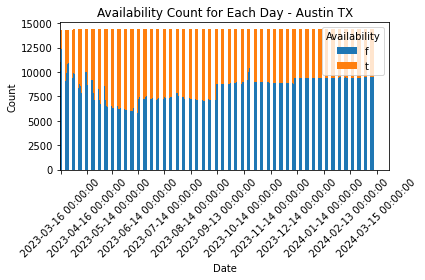

In [12]:

import matplotlib.dates as mdates

calendar_austin['date'] = pd.to_datetime(calendar_austin['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar_austin.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(20, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - Austin TX')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


## Denver Colorado

In [13]:
simple_eda(calendar_denver)

Basic Structure:
Number of Rows: 1957130
Number of Columns: 7

Missing Values by Column:
listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      0
maximum_nights      0
dtype: int64 

Data Types:
listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object 

Unique Values by Column:
listing_id: 5362
date: 365
available: 2
price: 2161
adjusted_price: 2160
minimum_nights: 50
maximum_nights: 247


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            1957130.000     1957130.000     1957130.000
mean  265104219863038048.000          32.092      401318.868
std   344460427503613952.000          75.828    29324181.900
min                  177.000           1.000           1.000
25%             35187856.000           2.000         

In [14]:
calculate_price_stats(calendar_denver)

{'maximum_price': 70151.0,
 'minimum_price': 0.0,
 'average_price': 204.52363284054493,
 'median_price': 140.0,
 'maximum_adjusted_price': 70151.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 203.99806383271186,
 'median_adjusted_price': 140.0}

In [15]:
calculate_price_difference_stats(calendar_denver)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 1446.0, 'min': 1.0, 'median': 13.0, 'average': 21.32935451114134}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
52364


<Figure size 1440x432 with 0 Axes>

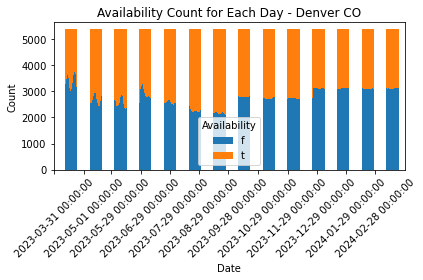

In [16]:

import matplotlib.dates as mdates

calendar_denver['date'] = pd.to_datetime(calendar_denver['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar_denver.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(20, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - Denver CO')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


## Nashville Tennessee

In [17]:
simple_eda(calendar_nashville)

Basic Structure:
Number of Rows: 3119707
Number of Columns: 7

Missing Values by Column:
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    1
maximum_nights    1
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 8547
date: 378
available: 2
price: 4621
adjusted_price: 4574
minimum_nights: 46
maximum_nights: 382


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            3119707.000     3119706.000     3119706.000
mean  278058000182747968.000           6.560     1242533.611
std   349045634302280320.000          17.790    51625659.883
min                 6422.000           1.000           1.000
25%             33017745.000           2.000         365.000

In [18]:
calculate_price_stats(calendar_nashville)

{'maximum_price': 78200.0,
 'minimum_price': 10.0,
 'average_price': 367.80576188725416,
 'median_price': 224.0,
 'maximum_adjusted_price': 78200.0,
 'minimum_adjusted_price': 10.0,
 'average_adjusted_price': 365.0460424648853,
 'median_adjusted_price': 223.0}

In [19]:
calculate_price_difference_stats(calendar_nashville)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 1527.0, 'min': 1.0, 'median': 17.0, 'average': 41.3944486838839}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
217534


<Figure size 720x432 with 0 Axes>

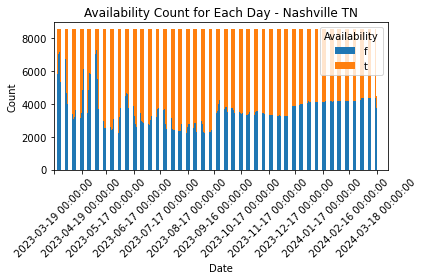

In [20]:

calendar_nashville['date'] = pd.to_datetime(calendar_nashville['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar_nashville.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - Nashville TN')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


## Chicago Illinois

In [21]:
simple_eda(calendar_chicago)

Basic Structure:
Number of Rows: 2827655
Number of Columns: 7

Missing Values by Column:
listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      0
maximum_nights      0
dtype: int64 

Data Types:
listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object 

Unique Values by Column:
listing_id: 7747
date: 365
available: 2
price: 3237
adjusted_price: 3233
minimum_nights: 71
maximum_nights: 387


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            2827655.000     2827655.000     2827655.000
mean  265087152005296448.000          42.164     3247534.436
std   344838097883059712.000         104.504    83436499.493
min                 2384.000           1.000           1.000
25%             30930197.000           2.000         

In [22]:
calculate_price_stats(calendar_chicago)

{'maximum_price': 99998.0,
 'minimum_price': 0.0,
 'average_price': 222.71273966537035,
 'median_price': 146.0,
 'maximum_adjusted_price': 99998.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 223.2149667336756,
 'median_adjusted_price': 145.0}

In [23]:
calculate_price_difference_stats(calendar_chicago)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 1600.0, 'min': 1.0, 'median': 24.0, 'average': 87.39892909318586}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
153499


<Figure size 720x432 with 0 Axes>

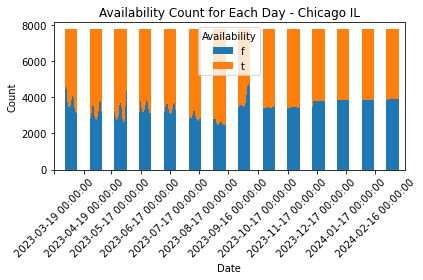

In [24]:

import matplotlib.dates as mdates

# Assuming you have the data in a DataFrame named calendar
calendar_chicago['date'] = pd.to_datetime(calendar_chicago['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar_chicago.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - Chicago IL')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


## New Orleans, Louisiana

In [25]:
simple_eda(calendar_nola)

Basic Structure:
Number of Rows: 2574386
Number of Columns: 7

Missing Values by Column:
listing_id           0
date                 0
available            0
price             1115
adjusted_price    1115
minimum_nights       6
maximum_nights       6
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 7054
date: 366
available: 2
price: 4277
adjusted_price: 4269
minimum_nights: 36
maximum_nights: 382


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            2574386.000     2574380.000     2574380.000
mean  218193869359243936.000          10.178     4617934.466
std   326005366947605568.000          17.934    99468347.424
min                19091.000           1.000           1.000
25%             23379514.000           

In [26]:
calculate_price_stats(calendar_nola)

{'maximum_price': 95158.0,
 'minimum_price': 0.0,
 'average_price': 293.10409008612,
 'median_price': 179.0,
 'maximum_adjusted_price': 95158.0,
 'minimum_adjusted_price': 0.0,
 'average_adjusted_price': 291.5444459600252,
 'median_adjusted_price': 179.0}

In [27]:
calculate_price_difference_stats(calendar_nola)

Absolute Price Difference Range (Excluding Zero Differences):
{'max': 3000.0, 'min': 1.0, 'median': 13.0, 'average': 36.38398767116366}


Number of Rows with Absolute Difference in Price and Adjusted Price (Excluding Zero Differences):
119861


<Figure size 720x432 with 0 Axes>

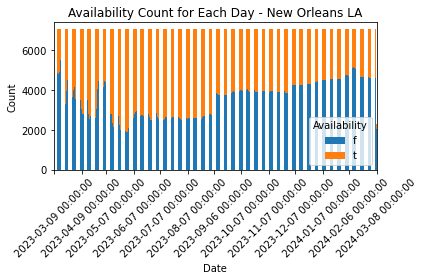

In [28]:

import matplotlib.dates as mdates

# Assuming you have the data in a DataFrame named calendar
calendar_nola['date'] = pd.to_datetime(calendar_nola['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar_nola.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day - New Orleans LA')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


### Combined Plot for Every City

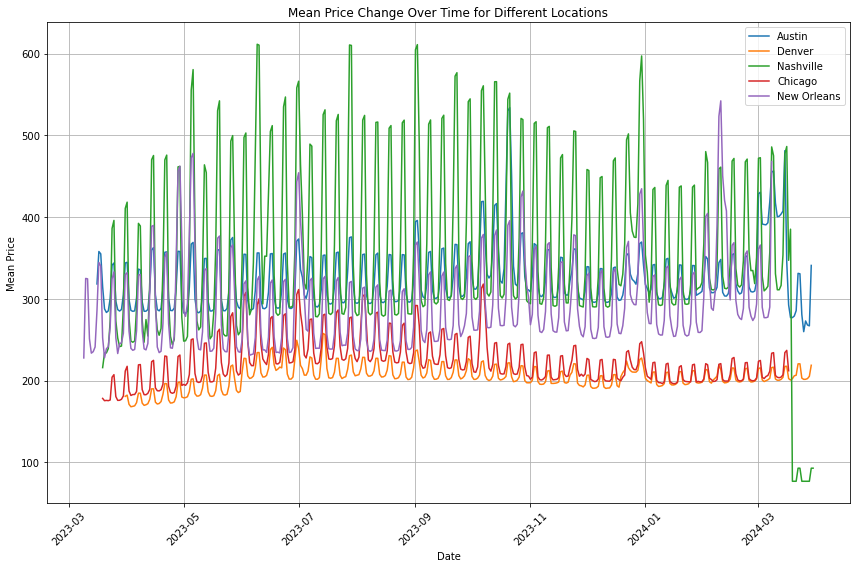

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary containing the DataFrames for each location
location_data = {
    'Austin': calendar_austin,
    'Denver': calendar_denver,
    'Nashville': calendar_nashville,
    'Chicago': calendar_chicago,
    'New Orleans': calendar_nola
}

# Dictionary to store mean price by date for each location
mean_price_by_location = {}

# Process data for each location
for location, data in location_data.items():
    # Convert 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Convert 'price' column to numeric after removing the dollar sign and converting to float
    data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

    # Group data by 'date' and calculate mean price for each day
    mean_price_by_date = data.groupby('date')['price'].mean()

    # Store mean price by date for this location
    mean_price_by_location[location] = mean_price_by_date

# Plotting
plt.figure(figsize=(12, 8))

for location, mean_price_by_date in mean_price_by_location.items():
    plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label=location.title())

plt.title('Mean Price Change Over Time for Different Locations')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


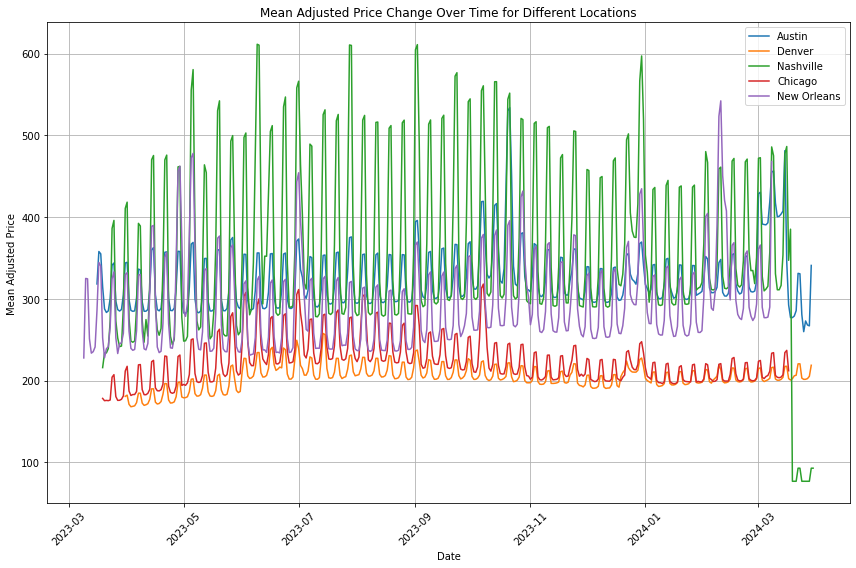

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary containing the DataFrames for each location
location_data = {
    'Austin': calendar_austin,
    'Denver': calendar_denver,
    'Nashville': calendar_nashville,
    'Chicago': calendar_chicago,
    'New Orleans': calendar_nola
}

# Dictionary to store mean price by date for each location
mean_price_by_location = {}

# Process data for each location
for location, data in location_data.items():
    # Convert 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Convert 'price' column to numeric after removing the dollar sign and converting to float
    data['adjusted_price'] = data['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

    # Group data by 'date' and calculate mean price for each day
    mean_price_by_date = data.groupby('date')['price'].mean()

    # Store mean price by date for this location
    mean_price_by_location[location] = mean_price_by_date

# Plotting
plt.figure(figsize=(12, 8))

for location, mean_price_by_date in mean_price_by_location.items():
    plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label=location.title())

plt.title('Mean Adjusted Price Change Over Time for Different Locations')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


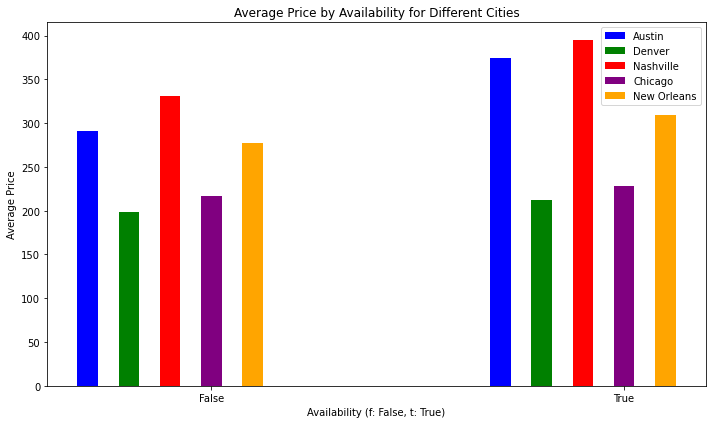

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'price' column to numeric after removing the dollar sign and converting to float
calendar_austin['price'] = calendar_austin['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_denver['price'] = calendar_denver['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_nashville['price'] = calendar_nashville['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_chicago['price'] = calendar_chicago['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_nola['price'] = calendar_nola['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available_austin = calendar_austin.groupby('available')['price'].mean()
price_by_available_denver = calendar_denver.groupby('available')['price'].mean()
price_by_available_nashville = calendar_nashville.groupby('available')['price'].mean()
price_by_available_chicago = calendar_chicago.groupby('available')['price'].mean()
price_by_available_nola = calendar_nola.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot for austin
plt.bar([0, 2], price_by_available_austin.values, width=0.1, color='blue', label='Austin')
# Plot for denver
plt.bar([0.2, 2.2], price_by_available_denver.values, width=0.1, color='green', label='Denver')
# Plot for nashville
plt.bar([0.4, 2.4], price_by_available_nashville.values, width=0.1, color='red', label='Nashville')
# Plot for chicago
plt.bar([0.6, 2.6], price_by_available_chicago.values, width=0.1, color='purple', label='Chicago')
# Plot for new orleans
plt.bar([0.8, 2.8], price_by_available_nola.values, width=0.1, color='orange', label='New Orleans')

plt.title('Average Price by Availability for Different Cities')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks([0.6, 2.6], ['False', 'True'])
plt.legend()
plt.tight_layout()
plt.show()


# Listings Detailed

### EDA Plots for AirBnB Dataset - Listings Detailed

1. Average Price by Number of People Allowed

2. Number of Reviews for Each Neighborhood

3. Correlation Heatmap of Review Scores and Price

4. Distribution of Hosts by Start Year Ranges

5. Host Sign-ups by Year (January of Each Year)

6. Room Type Distribution

In [32]:
listings_austin = pd.read_csv('usa/Austin/listings_detailed.csv')
listings_denver = pd.read_csv('usa/Denver/listings_detailed-denver.csv')
listings_nashville = pd.read_csv('usa/Nashville/listings_detailed-nashville.csv')
listings_chicago = pd.read_csv('usa/Chicago/listings_detailed.csv')
listings_nola = pd.read_csv('usa/New Orleans/listings_detailed-nola.csv')

### Austin TX

In [33]:
listings_austin.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20230316044216,2023-03-16,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.820,4.730,4.790,NaN,f,2,2,0,0,3.690
1,5769,https://www.airbnb.com/rooms/5769,20230316044216,2023-03-16,previous scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.940,4.760,4.920,NaN,f,1,0,1,0,1.750
2,6413,https://www.airbnb.com/rooms/6413,20230316044216,2023-03-16,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,...,4.980,4.870,4.930,NaN,f,1,1,0,0,0.760
3,6448,https://www.airbnb.com/rooms/6448,20230316044216,2023-03-16,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,...,4.970,4.970,4.900,NaN,t,1,1,0,0,2.100
4,8502,https://www.airbnb.com/rooms/8502,20230316044216,2023-03-17,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.860,4.640,4.570,NaN,f,1,1,0,0,0.300


In [34]:
simple_eda(listings_austin)

Basic Structure:
Number of Rows: 14368
Number of Columns: 75

Missing Values by Column:
id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                       130
neighborhood_overview                            5600
picture_url                                         1
host_id                                             0
host_url                                            0
host_name                                           2
host_since                                          2
host_location                                    2063
host_about                                       5363
host_response_time                               3793
host_response_rate                              

                          id          scrape_id       host_id  \
count              14368.000          14368.000     14368.000   
mean  269426700142774560.000 20230316044222.012 136226684.279   
std   349580982381409792.000              6.012 150712949.112   
min                 5456.000 20230316044216.000        23.000   
25%             23329719.250 20230316044216.000  15842395.000   
50%             49792132.000 20230316044216.000  66331459.000   
75%   676246746642852224.000 20230316044216.000 236195465.250   
max   847304715126157696.000 20230316044216.000 505184803.000   

       host_listings_count  host_total_listings_count  neighbourhood_cleansed  \
count            14366.000                  14366.000               14368.000   
mean               115.670                    156.347               78724.538   
std                595.518                    765.659                  20.699   
min                  1.000                      1.000               78701.000   
25%      

#### Average Price by Number of People Allowed

Below plot visualizes the average price of accommodations in Austin, Texas, based on the number of people they can accommodate. Each bar represents a different accommodation capacity, ranging from a minimum of one person to a maximum of sixteen people, with corresponding average prices displayed on the y-axis. As the accommodation capacity increases, there is a gradual rise in the average price, indicating a positive correlation between the number of people allowed and the price of the rental properties.

First assumption was if the number of allowed people goes up, price would also go up as the property size, the number of ammenities, time for cleaning and preparing for hosting has to be increased. However suprisingly, it is not the case, and in face, when # of people allowed exceeds 8, even number of people property is always bigger than the odd number of people allowed

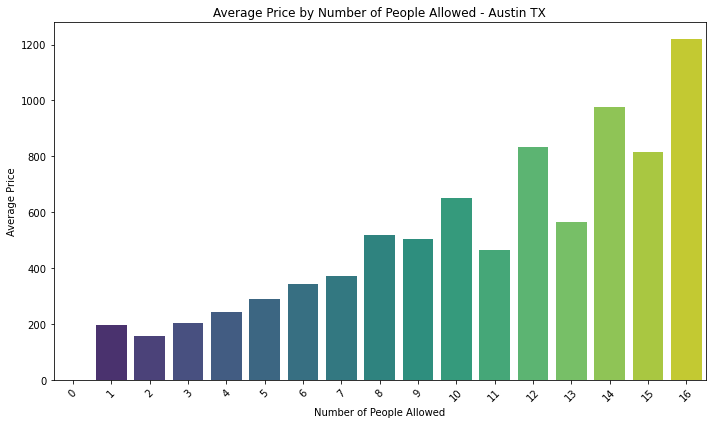

In [35]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_austin['price'] = listings_austin['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_austin.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed - Austin TX')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Number of Reviews for Each Neighborhood



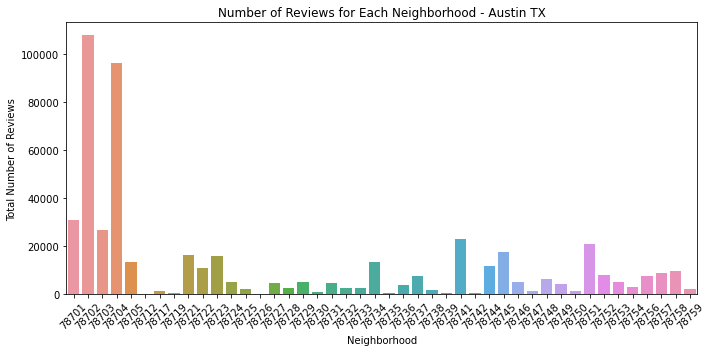

In [36]:
# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings_austin.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood - Austin TX')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Correlation Heatmap of Review Scores and Price

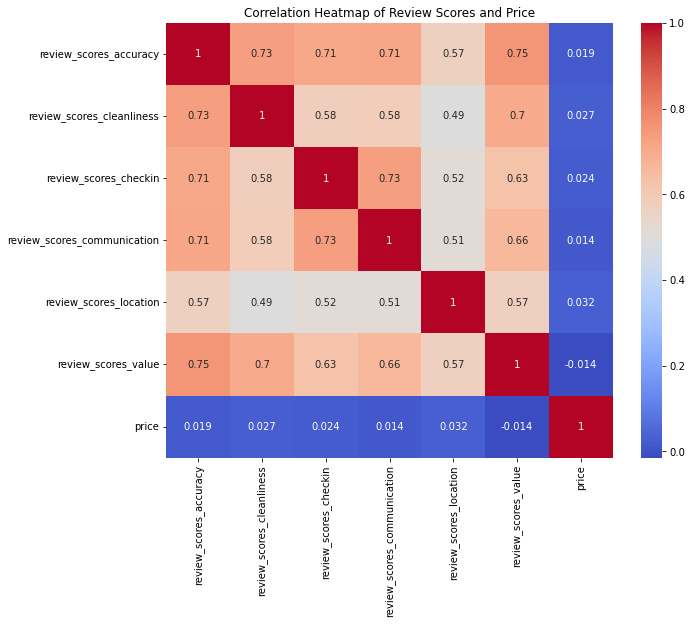

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

# Select the columns for the heatmap
heatmap_data = listings_austin[review_scores_columns]

# Calculating the correlation matrix
corr = heatmap_data.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Review Scores and Price')
plt.show()


### Denver CO

In [38]:
simple_eda(listings_denver)

Basic Structure:
Number of Rows: 5362
Number of Columns: 75

Missing Values by Column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       21
neighborhood_overview                           1502
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                    753
host_about                                      2093
host_response_time                               676
host_response_rate                               676
host_accepta

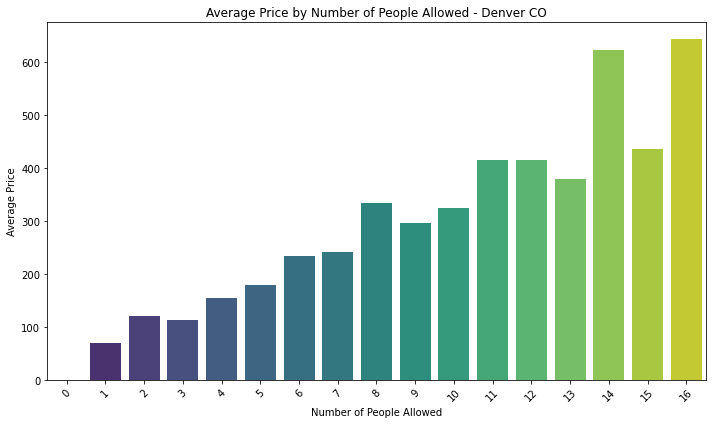

In [39]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_denver['price'] = listings_denver['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_denver.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed - Denver CO')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


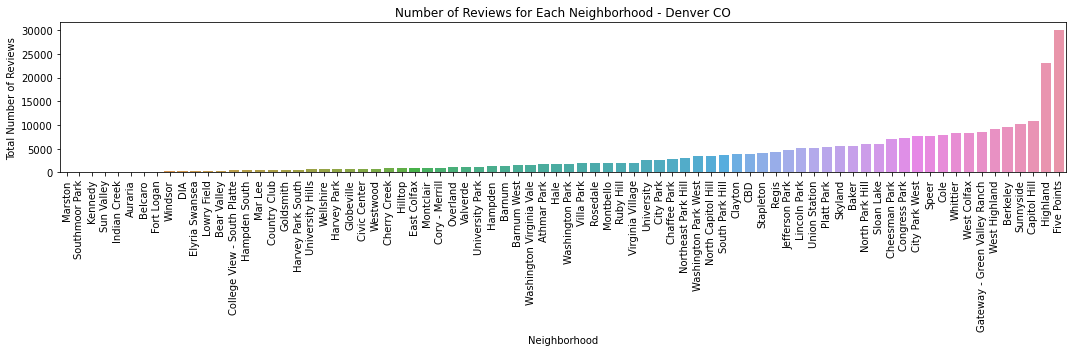

In [40]:
# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings_denver.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values()

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood - Denver CO')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


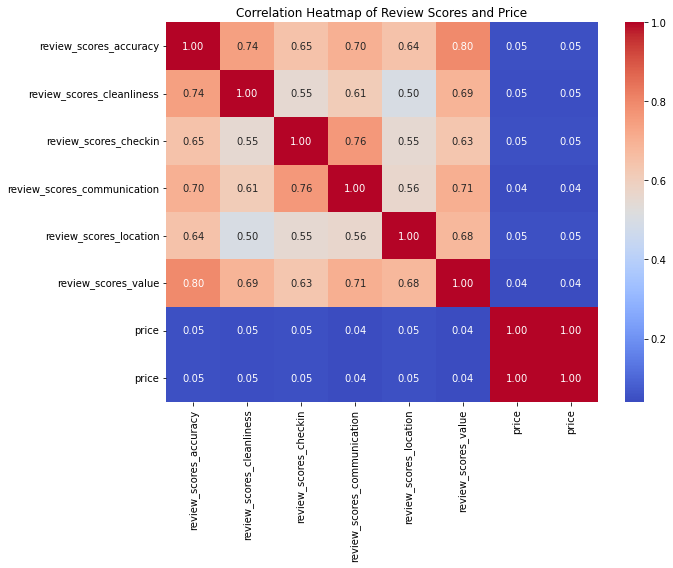

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

# Select the columns for the heatmap
heatmap_data = listings_denver[review_scores_columns + ['price']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores and Price')
plt.tight_layout()
plt.show()


### Nashville TN

In [42]:
simple_eda(listings_nashville)

Basic Structure:
Number of Rows: 8548
Number of Columns: 75

Missing Values by Column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       44
neighborhood_overview                           2420
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   1453
host_about                                      2679
host_response_time                               801
host_response_rate                               801
host_accepta

calendar_last_scraped: 3
number_of_reviews: 503
number_of_reviews_ltm: 160
number_of_reviews_l30d: 27
first_review: 2032
last_review: 709
review_scores_rating: 131
review_scores_accuracy: 119
review_scores_cleanliness: 129
review_scores_checkin: 126
review_scores_communication: 119
review_scores_location: 148
review_scores_value: 135
license: 0
instant_bookable: 2
calculated_host_listings_count: 53
calculated_host_listings_count_entire_homes: 49
calculated_host_listings_count_private_rooms: 20
calculated_host_listings_count_shared_rooms: 3
reviews_per_month: 825


Summary Statistics for Numerical Columns:
                          id          scrape_id       host_id  \
count               8548.000           8548.000      8548.000   
mean  278026957959139808.000 20230319180928.211 167396965.968   
std   349059103690644352.000              1.789 157229839.139   
min                 6422.000 20230319180930.000      1147.000   
25%             33019710.000 20230319180930.000  31171566.750 

['["Lock on bedroom door", "Iron", "Washer \\u2013\\u00a0In building", "Kayak", "Private living room", "Freezer", "Ethernet connection", "TV", "Mini fridge", "Luggage dropoff allowed", "Bathtub", "Wifi", "Ceiling fan", "Essentials", "First aid kit", "Cooking basics", "Extra pillows and blankets", "Hair dryer", "Shampoo", "Books and reading material", "Dedicated workspace", "Hammock", "Shared patio or balcony", "Toaster", "Dr. Bronners body soap", "Cleaning products", "All natural conditioner", "Fire extinguisher", "Hot water", "Backyard", "Free street parking", "Coffee maker: pour-over coffee", "Smoke alarm", "Air conditioning", "Outdoor dining area", "Carbon monoxide alarm", "Hot water kettle", "Bed linens", "Clothing storage: closet, wardrobe, and dresser", "Coffee", "Long term stays allowed", "Microwave", "Portable fans", "Kitchen", "Hangers", "Dishes and silverware", "Room-darkening shades", "Outdoor furniture", "Dryer \\u2013 In building", "Host greets you", "Heating", "Free drive

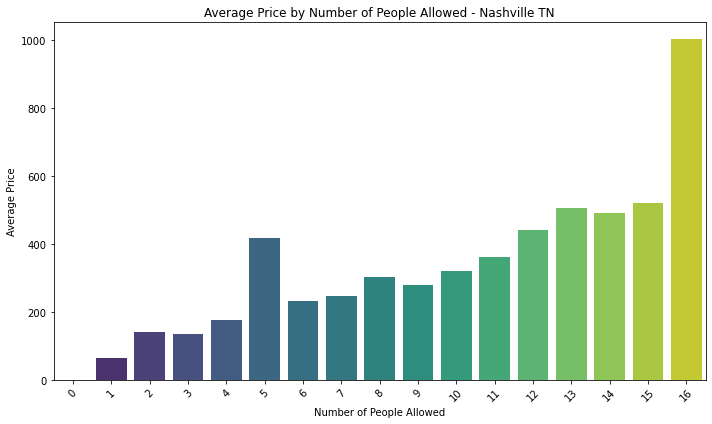

In [43]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_nashville['price'] = listings_nashville['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_nashville.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed - Nashville TN')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


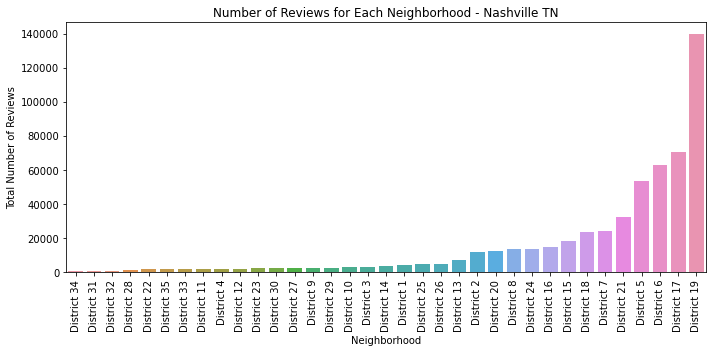

In [44]:
# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings_nashville.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood - Nashville TN')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


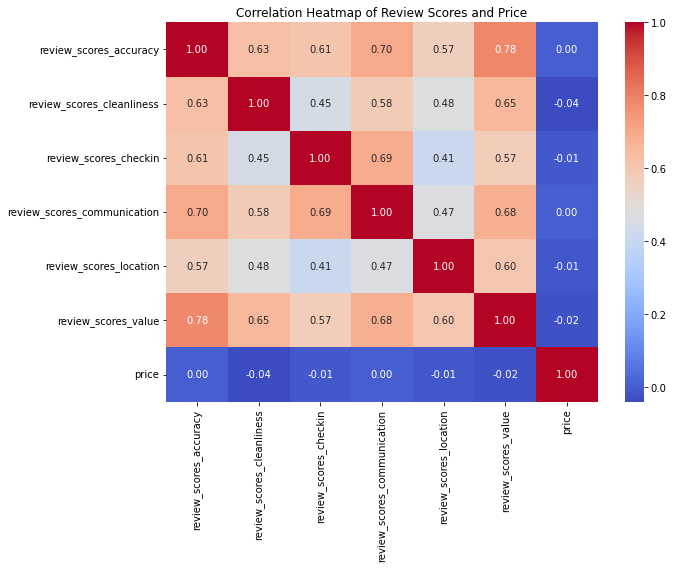

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

# Select the columns for the heatmap
heatmap_data = listings_nashville[review_scores_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores and Price')
plt.tight_layout()
plt.show()


### Chicago IL

In [46]:
simple_eda(listings_chicago)

Basic Structure:
Number of Rows: 7747
Number of Columns: 75

Missing Values by Column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       11
neighborhood_overview                           2298
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   1392
host_about                                      2558
host_response_time                              1000
host_response_rate                              1000
host_accepta

['https://a0.muscache.com/im/pictures/user/8bb4745c-c262-42e6-bb8d-4e8f4b638f8e.jpg?aki_policy=profile_x_medium'
 'https://a0.muscache.com/im/pictures/user/dcf7dc2a-3134-4ac1-b05c-6562cfe4e5c3.jpg?aki_policy=profile_x_medium'
 'https://a0.muscache.com/im/pictures/user/0f326f05-1077-4dd2-87ff-1b5c700be4bd.jpg?aki_policy=profile_x_medium'
 ...
 'https://a0.muscache.com/im/users/46734/profile_pic/1328157740/original.jpg?aki_policy=profile_x_medium'
 'https://a0.muscache.com/im/users/27506/profile_pic/1315447835/original.jpg?aki_policy=profile_x_medium'
 'https://a0.muscache.com/im/pictures/user/83ef1098-f255-47ec-8daa-823daaa4bc4a.jpg?aki_policy=profile_x_medium']
Column 'host_neighbourhood' unique values:
['Hyde Park' 'Lakeview' 'Woodlawn' 'Irving Park' 'Lake View East'
 'South Loop/Printers Row' 'Bucktown' 'River West' 'Palermo'
 'Garfield Park' 'Pilsen' 'Kenwood' 'Wrigleyville' 'Wicker Park'
 'Roscoe Village' 'Portage Park' 'West Loop/Greektown' 'Lincoln Square'
 'Ukrainian Village' 'W

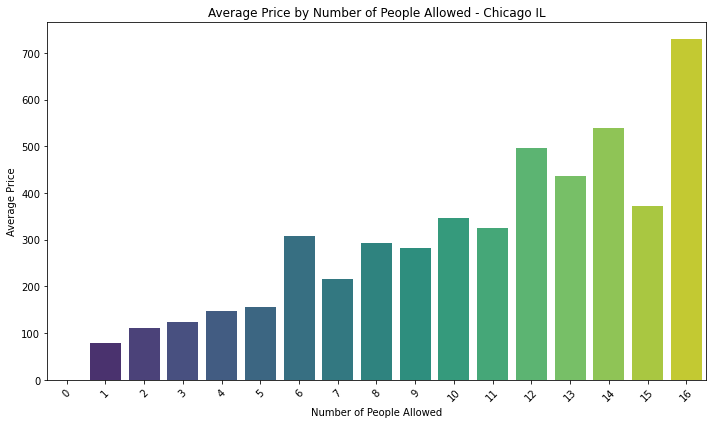

In [47]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_chicago['price'] = listings_chicago['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_chicago.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed - Chicago IL')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


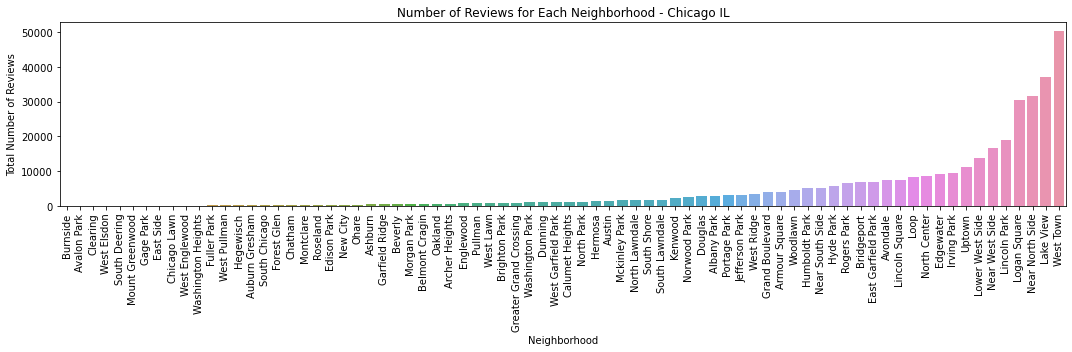

In [48]:
# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings_chicago.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values()

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood - Chicago IL')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


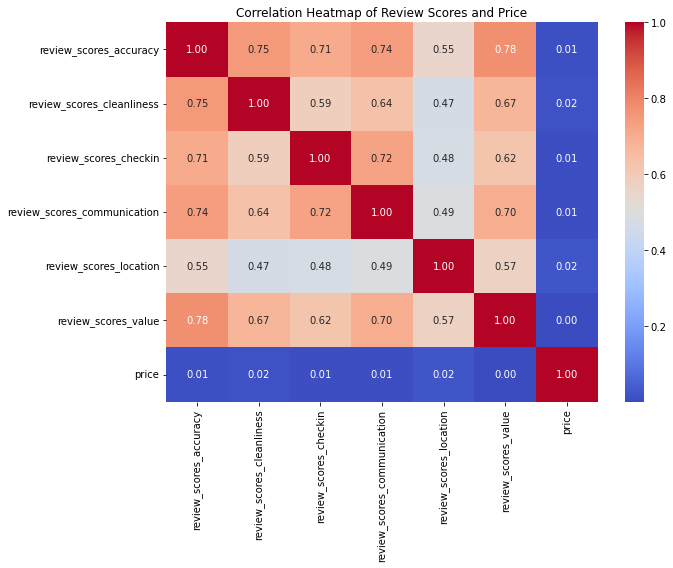

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

# Select the columns for the heatmap
heatmap_data = listings_chicago[review_scores_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores and Price')
plt.tight_layout()
plt.show()


### New Orleans LA

In [50]:
simple_eda(listings_nola)

Basic Structure:
Number of Rows: 7056
Number of Columns: 75

Missing Values by Column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       25
neighborhood_overview                           2037
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   1802
host_about                                      3102
host_response_time                              1161
host_response_rate                              1161
host_accepta

['2023-03-10' '2023-03-09']
Column 'first_review' unique values:
['2020-12-18' '2022-06-17' '2022-05-08' ... '2018-09-13' '2018-10-26'
 '2019-01-03']
Column 'last_review' unique values:
['2022-09-23' '2022-08-26' '2023-02-26' nan '2019-07-08' '2023-03-06'
 '2023-03-05' '2022-11-12' '2022-12-27' '2022-07-02' '2019-03-24'
 '2022-10-16' '2020-07-04' '2018-01-29' '2023-02-24' '2020-02-27'
 '2023-02-22' '2023-02-27' '2023-03-03' '2023-03-04' '2019-11-11'
 '2023-02-06' '2020-09-16' '2023-02-12' '2018-02-13' '2017-03-18'
 '2023-02-21' '2017-06-11' '2023-02-11' '2021-04-02' '2023-03-02'
 '2022-10-15' '2022-12-11' '2023-02-20' '2020-06-26' '2022-12-26'
 '2019-07-07' '2018-07-09' '2023-02-23' '2017-12-16' '2021-08-01'
 '2023-02-13' '2022-06-11' '2020-03-12' '2023-02-28' '2015-01-02'
 '2022-05-23' '2023-02-19' '2020-02-23' '2023-01-30' '2021-05-16'
 '2023-02-03' '2022-11-28' '2022-05-17' '2019-02-19' '2023-03-01'
 '2023-03-08' '2022-01-19' '2023-03-07' '2022-10-30' '2023-02-17'
 '2018-10-15' '202

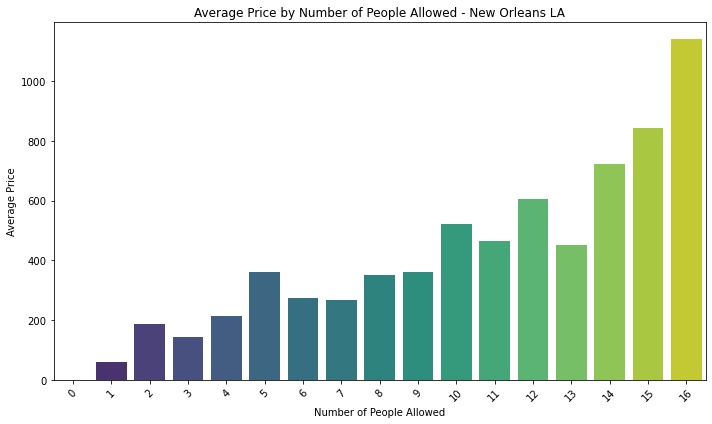

In [51]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_nola['price'] = listings_nola['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_nola.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed - New Orleans LA')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


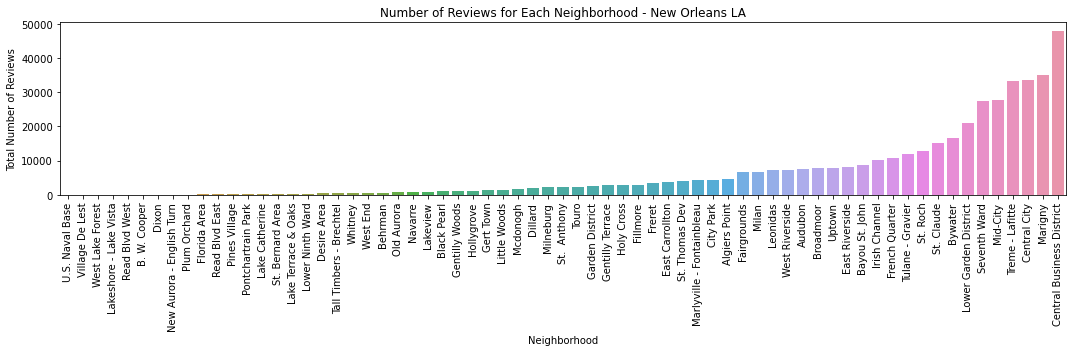

In [52]:
# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings_nola.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values()

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood - New Orleans LA')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


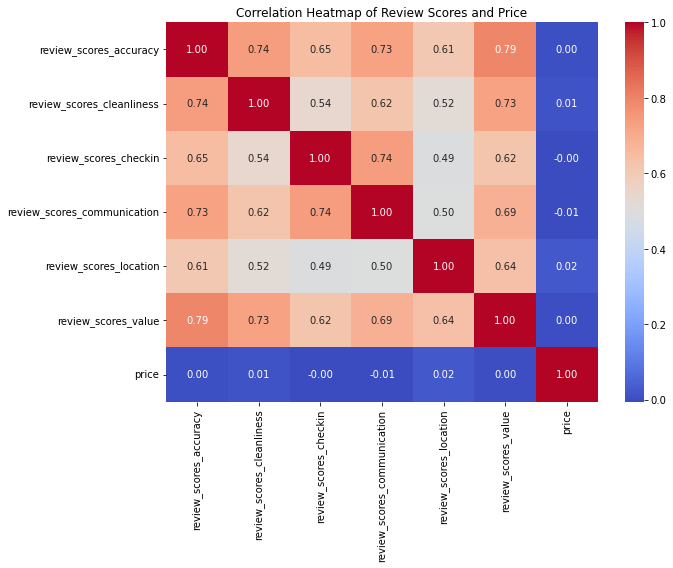

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value', 'price']

# Select the columns for the heatmap
heatmap_data = listings_nola[review_scores_columns]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores and Price')
plt.tight_layout()
plt.show()


### How many year since the host has been the host of AirBnB?

In [54]:
listings_nola['host_since'].head(5)

0    2019-06-10
1    2018-11-25
2    2019-02-20
3    2012-12-17
4    2017-04-26
Name: host_since, dtype: object

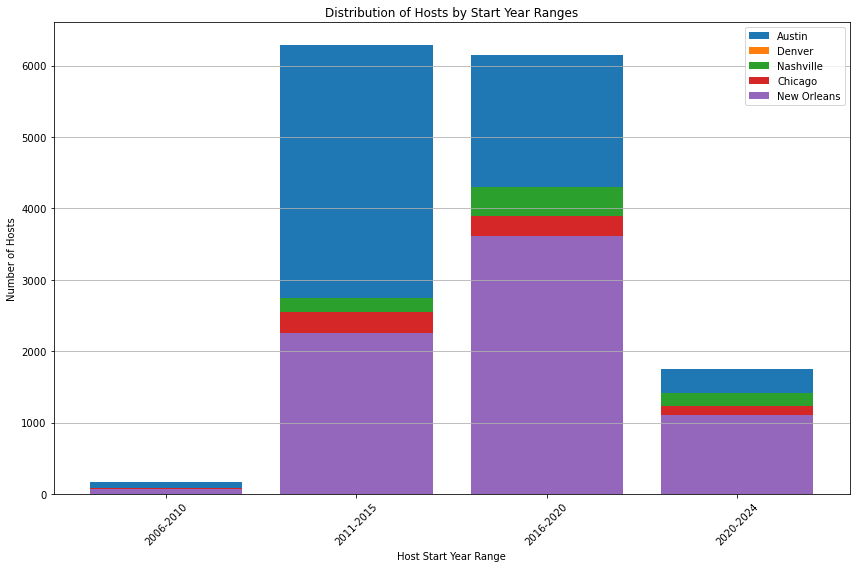

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary containing the DataFrames for each location
location_data = {
    'Austin': listings_austin,
    'Denver': listings_denver,
    'Nashville': listings_nashville,
    'Chicago': listings_chicago,
    'New Orleans': listings_nola
}

# Process data for each location
for location, data in location_data.items():
    # Convert 'host_since' column to datetime
    data['host_since'] = pd.to_datetime(data['host_since'])

# Create bins for host start year ranges
bins = [pd.to_datetime('2006-01-01'), pd.to_datetime('2011-01-01'), pd.to_datetime('2016-01-01'), pd.to_datetime('2021-01-01'), pd.to_datetime('2025-01-01')]
labels = ['2006-2010', '2011-2015', '2016-2020', '2020-2024']

# Count hosts in each bin for each location
host_counts = {}
for location, data in location_data.items():
    host_counts[location] = pd.cut(data['host_since'], bins=bins, labels=labels, right=False).value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 8))

for location, counts in host_counts.items():
    plt.bar(counts.index, counts.values, label=location.title())

plt.title('Distribution of Hosts by Start Year Ranges')
plt.xlabel('Host Start Year Range')
plt.ylabel('Number of Hosts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


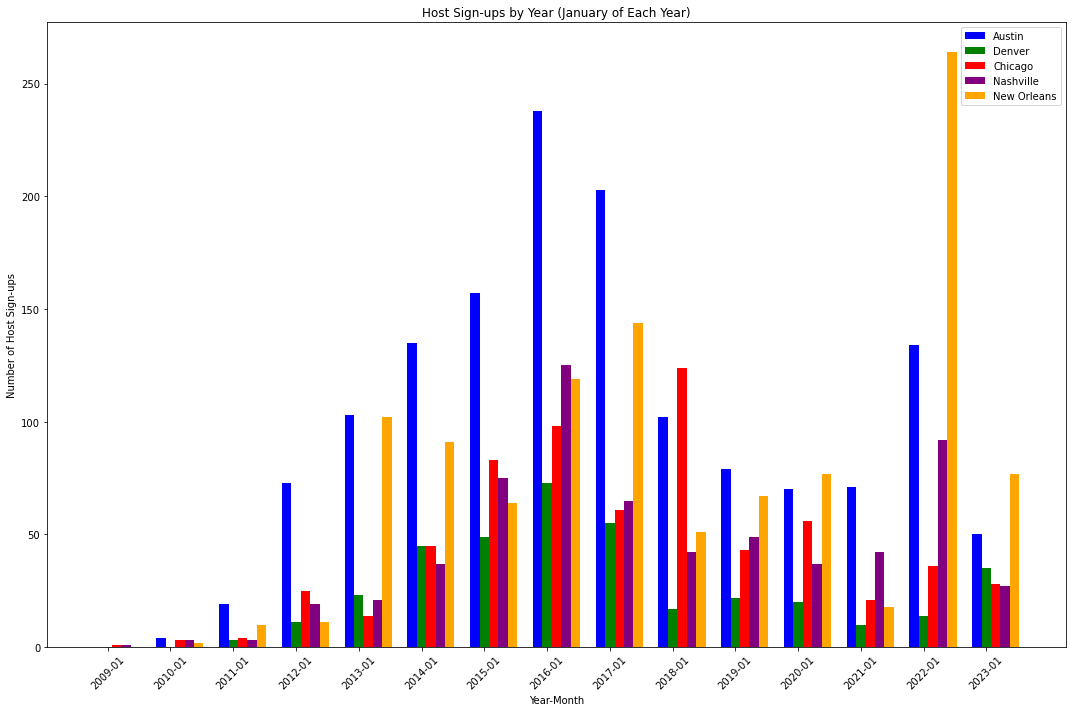

In [79]:
def plot_yearly_monthly_counts(dataframes):
    """
    Plots the monthly counts for each DataFrame with x-axis labels for the first month of each year.
    Parameters:
    - dataframes: A dictionary of DataFrames with city names as keys.
    """
    plt.figure(figsize=(15, 10))
    # Set up colors for each city
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    width = 0.15  # Bar width
    # Get the unique 'Year-Month' for January across all datasets
    all_jan_months = []
    for df in dataframes.values():
        df['Year-Month'] = pd.to_datetime(df['host_since']).dt.to_period('M')
        jan_months = df[df['Year-Month'].dt.month == 1]['Year-Month'].unique()
        all_jan_months.extend(jan_months)
    all_jan_months = sorted(set(all_jan_months))
    # Create positions for the bars
    positions = np.arange(len(all_jan_months))
    # Plot data for each city
    for i, (city, df) in enumerate(dataframes.items()):
        # Group by 'Year-Month' and count instances, reindex to include all January months
        monthly_counts = df.groupby('Year-Month').size().reindex(all_jan_months, fill_value=0)
        plt.bar(positions + i * width, monthly_counts.values, width=width, color=colors[i], label=city)
    # Set x-axis ticks and labels to January of each year
    plt.xticks(positions + width, [str(month) for month in all_jan_months], rotation=45)
    plt.title('Host Sign-ups by Year (January of Each Year)')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Host Sign-ups')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
dataframes = {
    'Austin': listings_austin,
    'Denver': listings_denver,
    'Chicago': listings_chicago,
    'Nashville': listings_nashville,
    'New Orleans': listings_nola
}
plot_yearly_monthly_counts(dataframes)

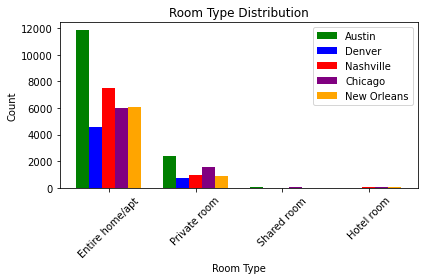

In [57]:
room_types = ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

room_type_austin = listings_austin['room_type'].value_counts()
room_type_denver = listings_denver['room_type'].value_counts()
room_type_nashville = listings_nashville['room_type'].value_counts()
room_type_chicago = listings_chicago['room_type'].value_counts()
room_type_nola = listings_nola['room_type'].value_counts()

bar_width = 0.15
index = np.arange(len(room_types))

plt.bar(index - 0.3, room_type_austin.reindex(room_types, fill_value=0), width=bar_width, color='green', label='Austin')
plt.bar(index - 0.15, room_type_denver.reindex(room_types, fill_value=0), width=bar_width, color='blue', label='Denver')
plt.bar(index, room_type_nashville.reindex(room_types, fill_value=0), width=bar_width, color='red', label='Nashville')
plt.bar(index + 0.15, room_type_chicago.reindex(room_types, fill_value=0), width=bar_width, color='purple', label='Chicago')
plt.bar(index + 0.3, room_type_nola.reindex(room_types, fill_value=0), width=bar_width, color='orange', label='New Orleans')

plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(index, room_types, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

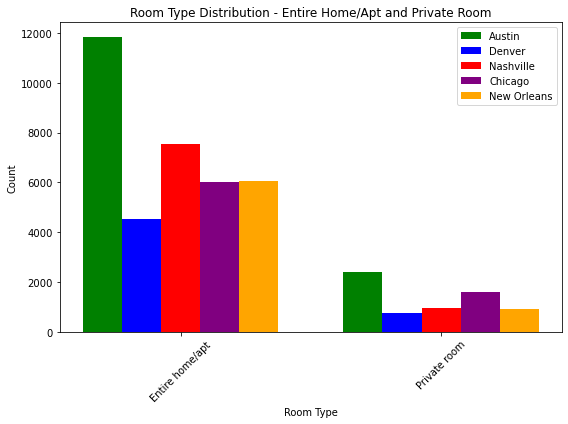

In [58]:
# Plotting Room Type Distribution
plt.figure(figsize=(8, 6))

room_types = ['Entire home/apt', 'Private room']
# 'Shared room', 'Hotel room']

room_type_austin = listings_austin['room_type'].value_counts()
room_type_denver = listings_denver['room_type'].value_counts()
room_type_nashville = listings_nashville['room_type'].value_counts()
room_type_chicago = listings_chicago['room_type'].value_counts()
room_type_nola = listings_nola['room_type'].value_counts()

bar_width = 0.15
index = np.arange(len(room_types))

plt.bar(index - 0.3, room_type_austin.reindex(room_types, fill_value=0), width=bar_width, color='green', label='Austin')
plt.bar(index - 0.15, room_type_denver.reindex(room_types, fill_value=0), width=bar_width, color='blue', label='Denver')
plt.bar(index, room_type_nashville.reindex(room_types, fill_value=0), width=bar_width, color='red', label='Nashville')
plt.bar(index + 0.15, room_type_chicago.reindex(room_types, fill_value=0), width=bar_width, color='purple', label='Chicago')
plt.bar(index + 0.3, room_type_nola.reindex(room_types, fill_value=0), width=bar_width, color='orange', label='New Orleans')

plt.title('Room Type Distribution - Entire Home/Apt and Private Room')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(index, room_types, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


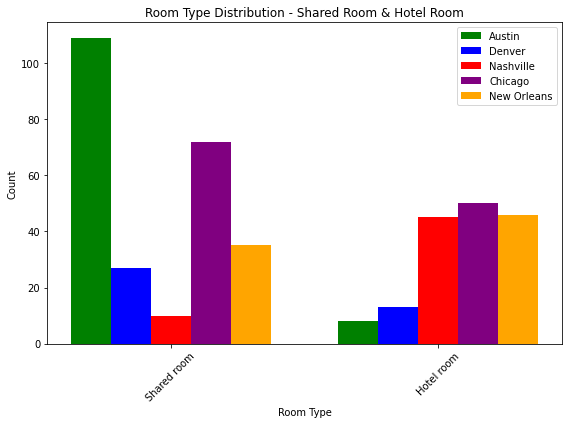

In [59]:
# Plotting Room Type Distribution
plt.figure(figsize=(8, 6))

room_types = ['Shared room', 'Hotel room']


room_type_austin = listings_austin['room_type'].value_counts()
room_type_denver = listings_denver['room_type'].value_counts()
room_type_nashville = listings_nashville['room_type'].value_counts()
room_type_chicago = listings_chicago['room_type'].value_counts()
room_type_nola = listings_nola['room_type'].value_counts()

bar_width = 0.15
index = np.arange(len(room_types))

plt.bar(index - 0.3, room_type_austin.reindex(room_types, fill_value=0), width=bar_width, color='green', label='Austin')
plt.bar(index - 0.15, room_type_denver.reindex(room_types, fill_value=0), width=bar_width, color='blue', label='Denver')
plt.bar(index, room_type_nashville.reindex(room_types, fill_value=0), width=bar_width, color='red', label='Nashville')
plt.bar(index + 0.15, room_type_chicago.reindex(room_types, fill_value=0), width=bar_width, color='purple', label='Chicago')
plt.bar(index + 0.3, room_type_nola.reindex(room_types, fill_value=0), width=bar_width, color='orange', label='New Orleans')

plt.title('Room Type Distribution - Shared Room & Hotel Room')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(index, room_types, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Neighbourhood


In [60]:
neigh_austin = pd.read_csv('usa/Austin/neighbourhoods-austin.csv')
neigh_denver = pd.read_csv('usa/Denver/neighbourhoods-denver.csv')
neigh_nashville = pd.read_csv('usa/Nashville/neighbourhoods-nashville.csv')
neigh_chicago = pd.read_csv('usa/Chicago/neighbourhoods-chicago.csv')
neigh_nola = pd.read_csv('usa/New Orleans/neighbourhoods-nola.csv')

In [61]:
simple_eda(neigh_austin)

Basic Structure:
Number of Rows: 44
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    44
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood            int64
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 44


Summary Statistics for Numerical Columns:
       neighbourhood_group  neighbourhood
count                0.000         44.000
mean                   NaN      78733.750
std                    NaN         16.422
min                    NaN      78701.000
25%                    NaN      78723.750
50%                    NaN      78734.500
75%                    NaN      78747.250
max                    NaN      78759.000 

No categorical columns found.


In [62]:
simple_eda(neigh_denver)

Basic Structure:
Number of Rows: 78
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    78
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 78


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' unique values:
['Athmar Park' 'Auraria' 'Baker' 'Barnum' 'Barnum West' 'Bear Valley'
 'Belcaro' 'Berkeley' 'Capitol Hill' 'CBD' 'Chaffee Park' 'Cheesman Park'
 'Cherry Creek' 'City Park' 'City Park West' 'Civic Center' 'Clayton'
 'Cole' 'College View - South Platte' 'Congress Park' 'Cory - Merrill'
 'Country Club' 'DIA' 'East Colfax' 'Elyria Swansea'

In [63]:
simple_eda(neigh_chicago)

Basic Structure:
Number of Rows: 77
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    77
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 77


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' unique values:
['Albany Park' 'Archer Heights' 'Armour Square' 'Ashburn' 'Auburn Gresham'
 'Austin' 'Avalon Park' 'Avondale' 'Belmont Cragin' 'Beverly' 'Bridgeport'
 'Brighton Park' 'Burnside' 'Calumet Heights' 'Chatham' 'Chicago Lawn'
 'Clearing' 'Douglas' 'Dunning' 'East Garfield Park' 'East Side'
 'Edgewater' 'Edison Park' 'Englewood' 'Forest Glen

In [64]:
simple_eda(neigh_nashville)

Basic Structure:
Number of Rows: 35
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    35
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 35


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' unique values:
['District 1' 'District 10' 'District 11' 'District 12' 'District 13'
 'District 14' 'District 15' 'District 16' 'District 17' 'District 18'
 'District 19' 'District 2' 'District 20' 'District 21' 'District 22'
 'District 23' 'District 24' 'District 25' 'District 26' 'District 27'
 'District 28' 'District 29' 'District 3' 'District 30'

In [65]:
simple_eda(neigh_nola)

Basic Structure:
Number of Rows: 72
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    72
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood           object
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 72


Summary Statistics for Numerical Columns:
       neighbourhood_group
count                0.000
mean                   NaN
std                    NaN
min                    NaN
25%                    NaN
50%                    NaN
75%                    NaN
max                    NaN 

Categorical Columns Details:
Column 'neighbourhood' unique values:
['Algiers Point' 'Audubon' 'Bayou St. John' 'Behrman' 'Black Pearl'
 'Broadmoor' 'B. W. Cooper' 'Bywater' 'Central Business District'
 'Central City' 'City Park' 'Desire Area' 'Dillard' 'Dixon'
 'East Carrollton' 'East Riverside' 'Fairgrounds' 'Fillmore' 'Fischer Dev'
 'Florida Area' 'Florida Dev' 'French Quarter' 'Freret' 'Garden Dist

# Review Detailed

### EDA Plots for AirBnB Dataset - Calendar

1. Number of Reviewer IDs by Number of Reviews Written

2. Total Number of Reviews in Each City

3. Total Number of Reviews per Day

4. Total Number of Reviews per Month

In [66]:
review_austin = pd.read_csv('usa/Austin/reviews_detailed-austin.csv')
review_denver = pd.read_csv('usa/Denver/reviews_detailed-denver.csv')
review_nashville = pd.read_csv('usa/Nashville/reviews_detailed-nashville.csv')
review_chicago = pd.read_csv('usa/Chicago/reviews_detailed-chicago.csv')
review_nola = pd.read_csv('usa/New Orleans/reviews_detailed-nola.csv')

### Austin TX

In [67]:
simple_eda(review_austin)

Basic Structure:
Number of Rows: 512941
Number of Columns: 6

Missing Values by Column:
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         120
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 11337
id: 512941
date: 4347
reviewer_id: 439828
reviewer_name: 45254
comments: 493190


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             512941.000             512941.000    512941.000
mean   59656201483384000.000 288012139094499936.000 137856190.042
std   189465408093474496.000 328237531049833088.000 131666161.794
min                 5456.000                865.000        14.000
25%              8780307.000          360774049.000  30938200.000
50%             23128066.000        

### Denver CO

In [68]:
simple_eda(review_denver)

Basic Structure:
Number of Rows: 275156
Number of Columns: 6

Missing Values by Column:
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         45
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 4402
id: 275156
date: 4039
reviewer_id: 251057
reviewer_name: 28297
comments: 266347


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             275156.000             275156.000    275156.000
mean   39507068012173272.000 287911158084825184.000 144947391.863
std   156036140755367296.000 325219354091472320.000 128178031.576
min                  177.000                749.000        18.000
25%             15844892.000          457282421.500  39938867.000
50%             26281251.000          74358

In [69]:
simple_eda(review_chicago)

Basic Structure:
Number of Rows: 355888
Number of Columns: 6

Missing Values by Column:
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         94
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 6254
id: 355888
date: 4013
reviewer_id: 319659
reviewer_name: 45743
comments: 342175


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             355888.000             355888.000    355888.000
mean   47211380042494712.000 285912314194317888.000 152401655.726
std   168180538579578048.000 324261585016108736.000 134196243.570
min                 2384.000               4982.000        65.000
25%             14154418.000          404858781.250  39919914.250
50%             25364755.000          73408

In [70]:
simple_eda(review_nashville)

Basic Structure:
Number of Rows: 541576
Number of Columns: 6

Missing Values by Column:
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         188
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 7360
id: 541576
date: 4007
reviewer_id: 494146
reviewer_name: 39073
comments: 519804


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             541576.000             541576.000    541576.000
mean   43977611295623512.000 303940843221631744.000 175514251.091
std   162637608791752480.000 326995524095252160.000 136340340.463
min                 6422.000               1927.000         2.000
25%             14054945.000          439310329.000  59379975.000
50%             25832972.000         

In [71]:
simple_eda(review_nola)

Basic Structure:
Number of Rows: 433045
Number of Columns: 6

Missing Values by Column:
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         111
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 6179
id: 433045
date: 4139
reviewer_id: 394114
reviewer_name: 50257
comments: 418668


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             433045.000             433045.000    433045.000
mean   39752319941148592.000 258739840156266144.000 145553909.897
std   156801449814226528.000 320690458829620096.000 130657918.142
min                19091.000              35930.000        14.000
25%             12388500.000          348127400.000  36571931.000
50%             22208723.000         

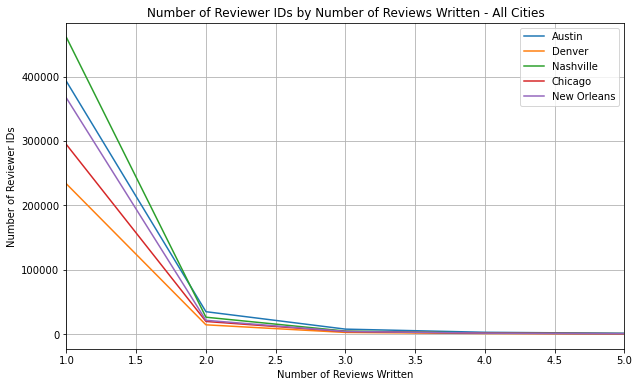

In [72]:


# Calculate the counts of reviews for each reviewer_id for all cities
review_counts_per_reviewer_austin = review_austin['reviewer_id'].value_counts()
review_counts_per_reviewer_denver = review_denver['reviewer_id'].value_counts()
review_counts_per_reviewer_nashville = review_nashville['reviewer_id'].value_counts()
review_counts_per_reviewer_chicago = review_chicago['reviewer_id'].value_counts()
review_counts_per_reviewer_nola = review_nola['reviewer_id'].value_counts()

# Aggregate these counts to find out how many reviewers have written N reviews for all cities
# This gives us the count of reviewer_ids for each review count.
aggregated_review_counts_austin = review_counts_per_reviewer_austin.value_counts().sort_index()
aggregated_review_counts_denver = review_counts_per_reviewer_denver.value_counts().sort_index()
aggregated_review_counts_nashville = review_counts_per_reviewer_nashville.value_counts().sort_index()
aggregated_review_counts_chicago = review_counts_per_reviewer_chicago.value_counts().sort_index()
aggregated_review_counts_nola = review_counts_per_reviewer_nola.value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(aggregated_review_counts_austin.index, aggregated_review_counts_austin.values, label='Austin')
plt.plot(aggregated_review_counts_denver.index, aggregated_review_counts_denver.values, label='Denver')
plt.plot(aggregated_review_counts_nashville.index, aggregated_review_counts_nashville.values, label='Nashville')
plt.plot(aggregated_review_counts_chicago.index, aggregated_review_counts_chicago.values, label='Chicago')
plt.plot(aggregated_review_counts_nola.index, aggregated_review_counts_nola.values, label='New Orleans')

plt.title('Number of Reviewer IDs by Number of Reviews Written - All Cities')
plt.xlabel('Number of Reviews Written')
plt.ylabel('Number of Reviewer IDs')
plt.xlim(1, 5)  # Set x-axis limit
plt.legend()
plt.grid(True)
plt.show()


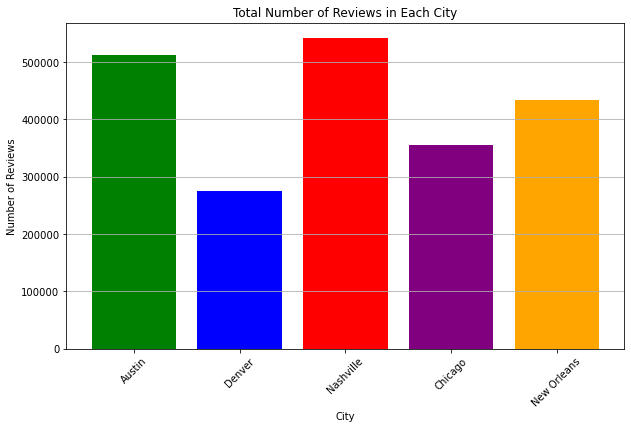

In [73]:
# Count the number of reviews for each city
total_reviews = {
    'Austin': len(review_austin),
    'Denver': len(review_denver),
    'Nashville': len(review_nashville),
    'Chicago': len(review_chicago),
    'New Orleans': len(review_nola)
}

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(total_reviews.keys(), total_reviews.values(), color=['green', 'blue', 'red', 'purple', 'orange'])

plt.title('Total Number of Reviews in Each City')
plt.xlabel('City')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

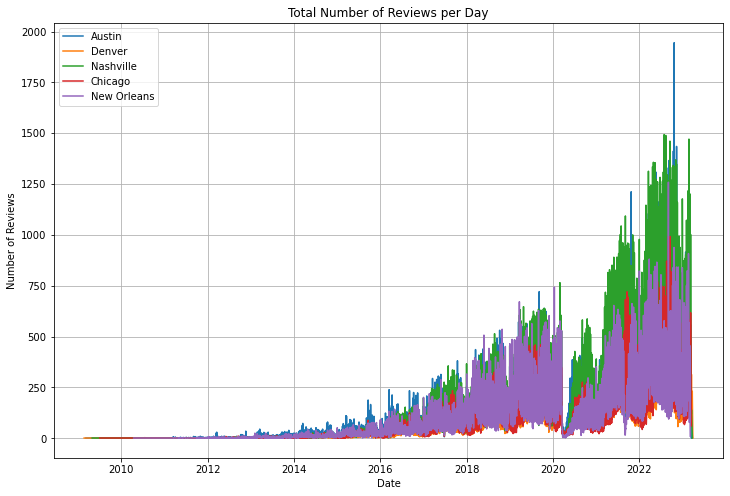

In [74]:
review_austin['date'] = pd.to_datetime(review_austin['date'])
review_denver['date'] = pd.to_datetime(review_denver['date'])
review_nashville['date'] = pd.to_datetime(review_nashville['date'])
review_chicago['date'] = pd.to_datetime(review_chicago['date'])
review_nola['date'] = pd.to_datetime(review_nola['date'])

# Group by date and count the number of reviews for each city
total_reviews_per_day_austin = review_austin.groupby(review_austin['date'].dt.date).size()
total_reviews_per_day_denver = review_denver.groupby(review_denver['date'].dt.date).size()
total_reviews_per_day_nashville = review_nashville.groupby(review_nashville['date'].dt.date).size()
total_reviews_per_day_chicago = review_chicago.groupby(review_chicago['date'].dt.date).size()
total_reviews_per_day_nola = review_nola.groupby(review_nola['date'].dt.date).size()

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(total_reviews_per_day_austin.index, total_reviews_per_day_austin.values, label='Austin')
plt.plot(total_reviews_per_day_denver.index, total_reviews_per_day_denver.values, label='Denver')
plt.plot(total_reviews_per_day_nashville.index, total_reviews_per_day_nashville.values, label='Nashville')
plt.plot(total_reviews_per_day_chicago.index, total_reviews_per_day_chicago.values, label='Chicago')
plt.plot(total_reviews_per_day_nola.index, total_reviews_per_day_nola.values, label='New Orleans')

plt.title('Total Number of Reviews per Day')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.show()

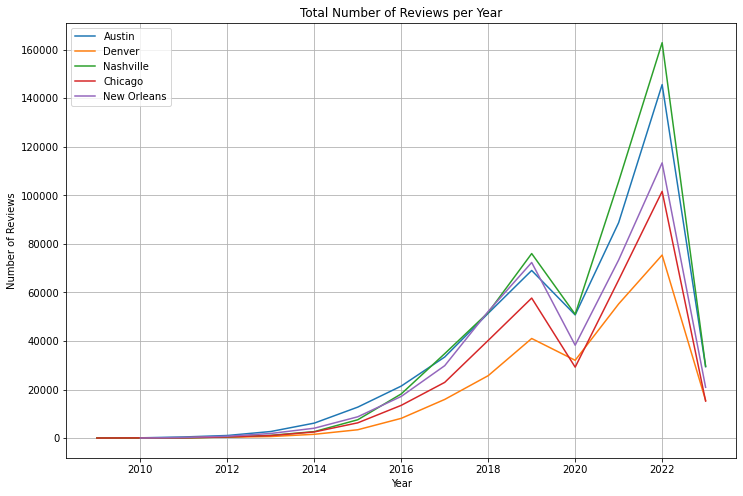

In [75]:
# Group by year and count the number of reviews for each city
total_reviews_per_year_austin = review_austin.groupby(review_austin['date'].dt.year).size()
total_reviews_per_year_denver = review_denver.groupby(review_denver['date'].dt.year).size()
total_reviews_per_year_nashville = review_nashville.groupby(review_nashville['date'].dt.year).size()
total_reviews_per_year_chicago = review_chicago.groupby(review_chicago['date'].dt.year).size()
total_reviews_per_year_nola = review_nola.groupby(review_nola['date'].dt.year).size()

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(total_reviews_per_year_austin.index, total_reviews_per_year_austin.values, label='Austin')
plt.plot(total_reviews_per_year_denver.index, total_reviews_per_year_denver.values, label='Denver')
plt.plot(total_reviews_per_year_nashville.index, total_reviews_per_year_nashville.values, label='Nashville')
plt.plot(total_reviews_per_year_chicago.index, total_reviews_per_year_chicago.values, label='Chicago')
plt.plot(total_reviews_per_year_nola.index, total_reviews_per_year_nola.values, label='New Orleans')

plt.title('Total Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.show()
